In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 실습 1) sklearn 예제

### 1. 패키지 불러오기

In [2]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]

### 2. DecisionTreeClassifier 객체 선언하기

In [3]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

### 3. 모델 학습하기

In [5]:
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

### 4. 예측 확인하기

#### 4.1 예측값 확인

In [7]:
clf.predict([[2, 2]])

array([1])

#### 4.2 예측율 확인

In [8]:
clf.predict_proba([[2, 2]])

array([[0., 1.]])

# 실습 2) iris_data 예제

### 1. 데이터 불러오기

In [9]:
from sklearn.datasets import load_iris
from sklearn import tree

X, y = load_iris(return_X_y=True)

### 2. DicisionTreeClassifier 객체 선언하기

In [10]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

### 3. 모델 학습하기

In [11]:
clf = clf.fit(X, y)
clf

DecisionTreeClassifier()

### 4. 학습한 모델 시각화하기

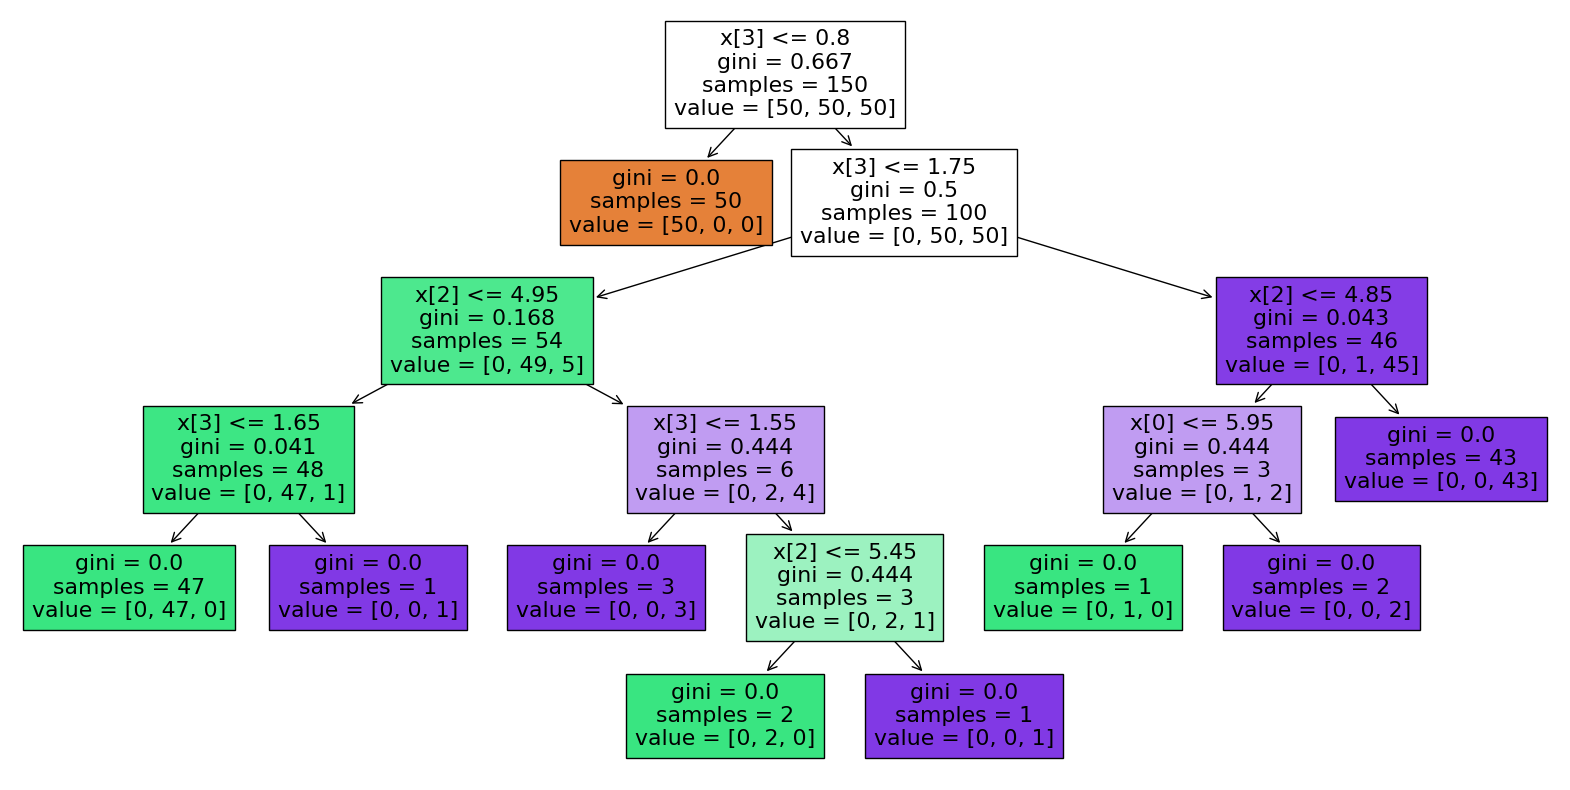

In [14]:
plt.figure(figsize=(20,10))
t = tree.plot_tree(clf.fit(X, y), filled=True)

# 실습 3) Diabetes 데이터셋 예제

### 1. 데이터 불러오기

In [16]:
df = pd.read_csv('./data/diabetes.csv')
df.shape

(768, 9)

In [17]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 2. 학습, 예측 데이터 나누기

#### 2.1 features, label을 분류

In [21]:
feature_names = df.columns[:8].to_list()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [22]:
label_name = df.columns[-1]
label_name

'Outcome'

#### 2.2 train, test 데이터로 분류

In [23]:
from sklearn.model_selection import train_test_split

X = df[feature_names]
y = df[label_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [27]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


### 3. 모델 학습 및 예측하기

### 3.1 모델 패키지 로드

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

#### 3.2 모델 학습

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 3.3 예측

In [32]:
y_pred = model.predict(X_test)
y_pred.shape

(154,)

### 4. 성능 확인하기

#### 4.1 트리 알고리즘 시각화

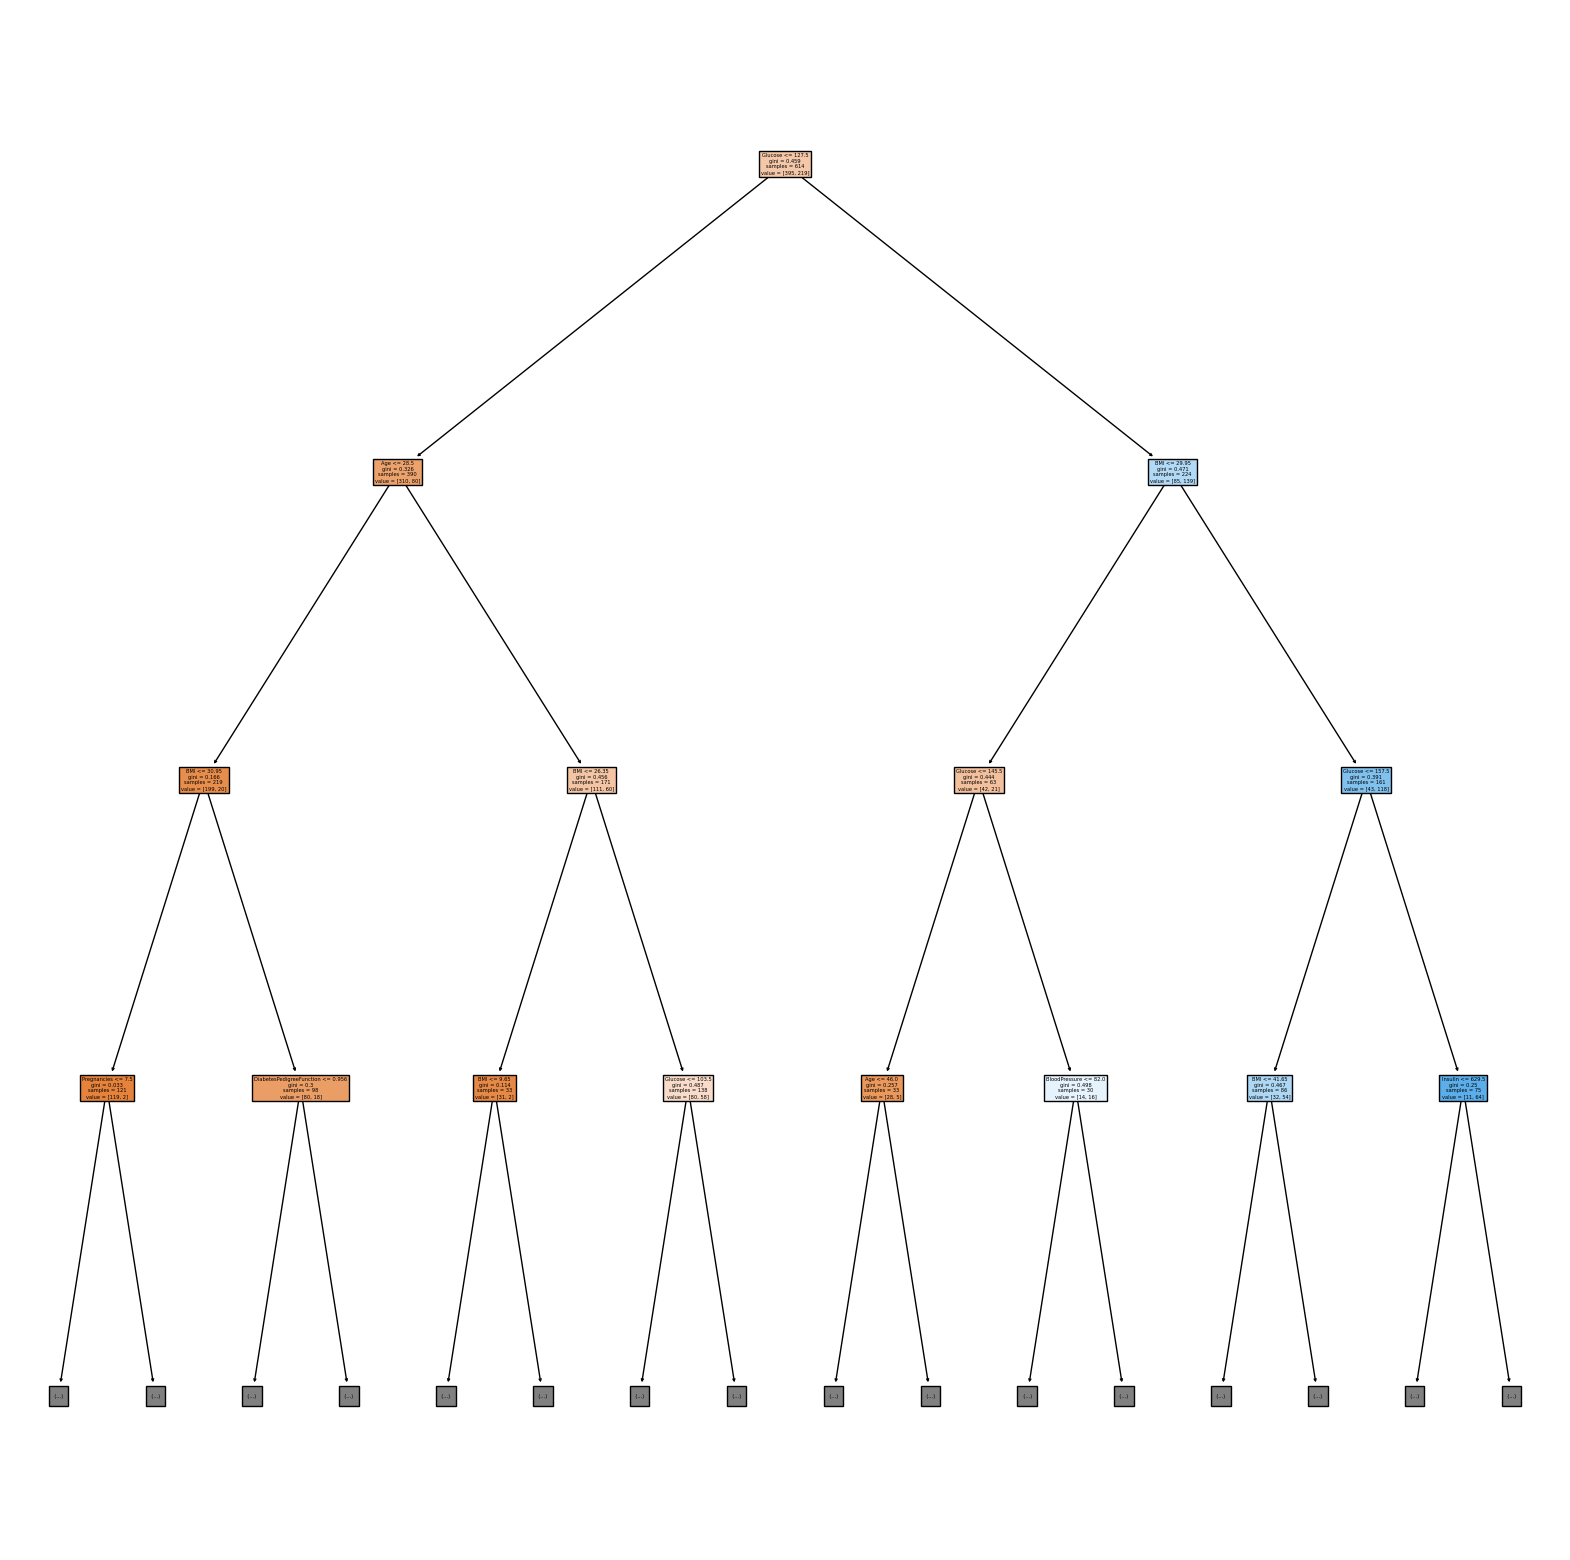

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                feature_names=feature_names,
                filled=True,
                max_depth=3)

#### 4.2 features 특성 중요도

array([0.07851965, 0.31249378, 0.07436538, 0.0386459 , 0.06753676,
       0.19834642, 0.13142956, 0.09866255])

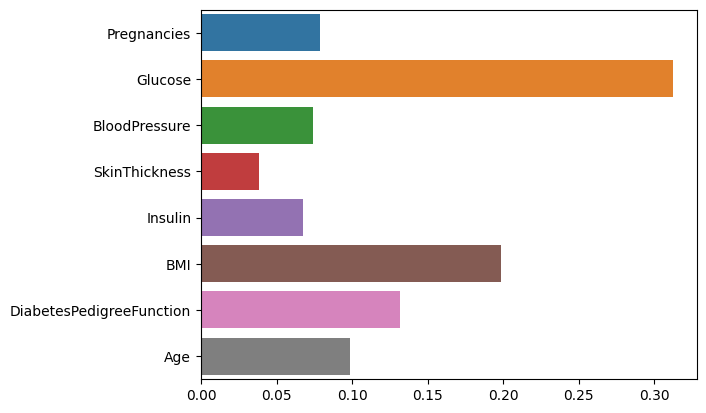

In [39]:
sns.barplot(x=model.feature_importances_, y=feature_names)

model.feature_importances_

#### 4.3 정확도 예측

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=y_pred)

0.7467532467532467